In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

# ici on génére matrice laplacienne de taille n
def matricLaplacienne(n):
    v=np.ones(n)
    A=np.diag(2*v)+np.diag(-1*np.ones(n-1),1)+np.diag(-1*np.ones(n-1),-1)
    return A

#On définit la fonction f
def fonction(x):
    return np.sin(m.pi*x)

# On construit le vecteur second membre dépendant de f,n
def SecondMembre(f,n):
    h=1/(n+1)
    x=np.linspace(h,1-h,n)
    return h*h*f(x)

# La solution théorique exacte   
def solexact(x):
    return (1/m.pi**2)*np.sin(m.pi*x)
    
# 2- Solution du solver

# Solution du syst matriciel par le Solver
def Integ(f,n):
    A=matricLaplacienne(n)
    F=SecondMembre(f,n)
    return np.linalg.solve(A,F)

# Tracé les deux solutions théorique et approximé par syst matriciel-Solver
def tracSolver(n,f):
    x=np.linspace(0,1,n+2)
    y=np.zeros(n+2)
    y[1:n+1]=Integ(f,n)
    t=solexact(x)
    plt.title("Comparison des sols- Méthode solver-")
    plt.plot(x,y,'b',label="sol approximée")
    plt.plot(x,t,'r', label="sol théorique")
    plt.legend()
    plt.show()
    
# Estimation de l'erreur pour la norme infini

# 3- Solution par la méthode de Cholesky

# Restitution de la matrice B : factorisation de Cholesky (A>>0 , A=B*transpose(B) )
def Cholesky(A):
    n=len(A)
    B=np.zeros((n,n))
    B[0,0]=m.sqrt(A[0,0])
    B[1,0]=A[0,1]/B[0,0]
    for i in range(1,n-1):
            B[i,i]=m.sqrt(A[i,i]-B[i,i-1]*B[i,i-1])
            B[i+1,i]=A[i+1,i]/B[i,i]
    B[n-1,n-1]=m.sqrt(A[n-1,n-1]-B[n-1,n-2]**2)
    return B
    
# Résolution Ax=b par descent  (A triangulaire inf)
def descente(A,b):
    n=len(A)
    x=np.zeros(n)
    x[0]=b[0]/A[0,0]
    for i in range(1,n):
        x[i]=(b[i]-A[i,i-1]*x[i-1])/A[i,i]
    return x

#Résolution Ax=b par remontée (A triangilaire supérieure)
def remonte(A,b):
    n=len(A)
    x=np.zeros(n)
    x[n-1]=b[n-1]/A[n-1,n-1]
    for i in range(n-2,-1,-1):
        x[i]=(b[i]-A[i,i+1]*x[i+1])/A[i,i]
    return x
    
# Résolution Ax=b par Cholesky (A>>0)
def solvCholesky(A,b):
    B=Cholesky(A)
    x=descente(B,b)
    y=remonte(np.transpose(B),x)
    return y
    
# Tracé des deux solutions : théorique et approximé par syst matriciel-cholesky
def tracCholesk(n,f):
    x=np.linspace(0,1,n+2)
    y=np.zeros(n+2)
    A=matricLaplacienne(n)
    F=SecondMembre(f,n)
    y[1:n+1]=solvCholesky(A,F)
    t=solexact(x)
    plt.title("Comparison des sols- Méthode Cholesky-")
    plt.plot(x,y,'b',label="Cholesky")
    plt.plot(x,t,'r',label="Théorique")
    plt.legend()
    plt.show()
 

In [5]:
matricLaplacienne(10)

array([[ 2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2.]])

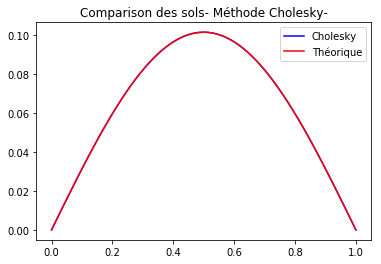

In [4]:
tracCholesk(100,fonction)